This test demonstrates the shallow-water Rossby-Haurwitz wave, a planetary wave that represents a balance between the mass field and vorticity. This wave is unstable and will eventually break down as instabilities build. Many dynamical cores proudly show how they can maintain the wave to 14 days before it breaks. How long can FV3 maintain the wave? (**Spoiler**: a lot longer!)

In [1]:
import xarray as xa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
import cartopy.crs as ccrs
import colorsys
import dask #Chunking will be necessary for the larger datasets

In [2]:
infile96="/archive/lmh/SHiELD/202103/C96.RHwave/history/0000000000/atmos_daily.nc"
da96=xa.open_dataset(infile96,decode_times=False,chunks={'time': 1}).squeeze() #xarray is confused by solo_core's NO_CALENDAR

Here are the initial conditions, an intially-balanced wave. For this test, the initial solution is so smooth that we use a contour plot to save my eyes from further damage.

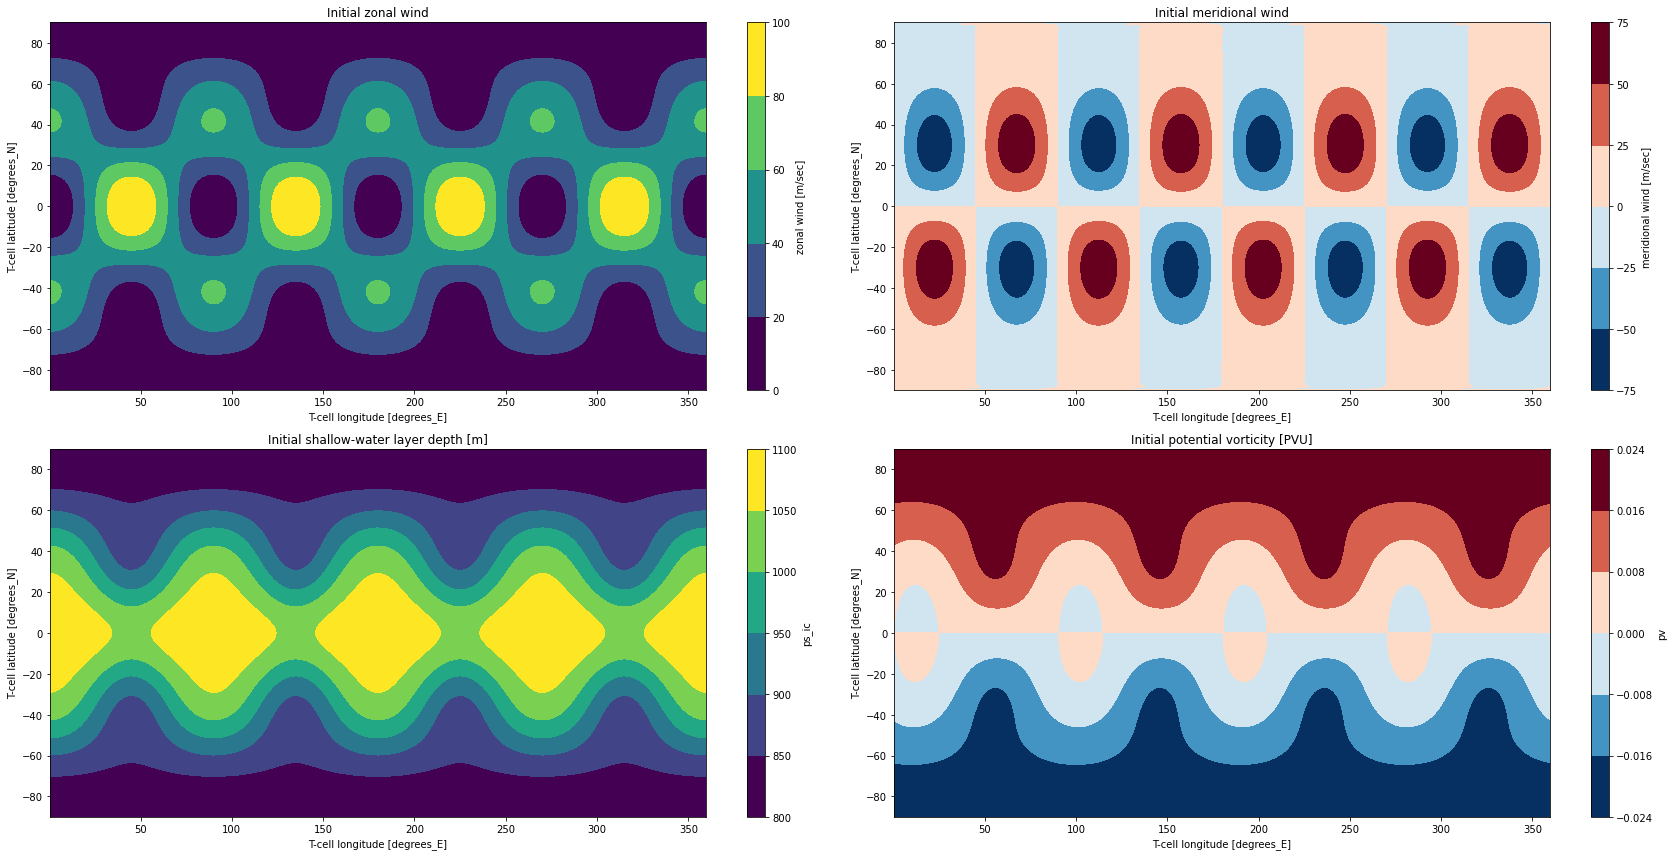

In [3]:
fig = plt.figure(figsize=(24,12))
gs = fig.add_gridspec(2,2)

ax = fig.add_subplot(gs[0,0])
da96.ua_ic.plot.contourf()
ax.set_title("Initial zonal wind")

ax = fig.add_subplot(gs[0,1])
da96.va_ic.plot.contourf()
ax.set_title("Initial meridional wind")

ax = fig.add_subplot(gs[1,0])
(da96.ps_ic/9.81).plot.contourf()
ax.set_title("Initial shallow-water layer depth [m]")

ax = fig.add_subplot(gs[1,1])
(da96.pv.isel(time=0)*1.e6).plot.contourf()
ax.set_title("Initial potential vorticity [PVU]")


fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

Here we show the mass field (in m of fluid depth) every 15 days. Oscillations in the field are seen but the wave does not break down until after day 90---far longer than most cores. This result was originally established in Lin and Rood (1997, QJ).

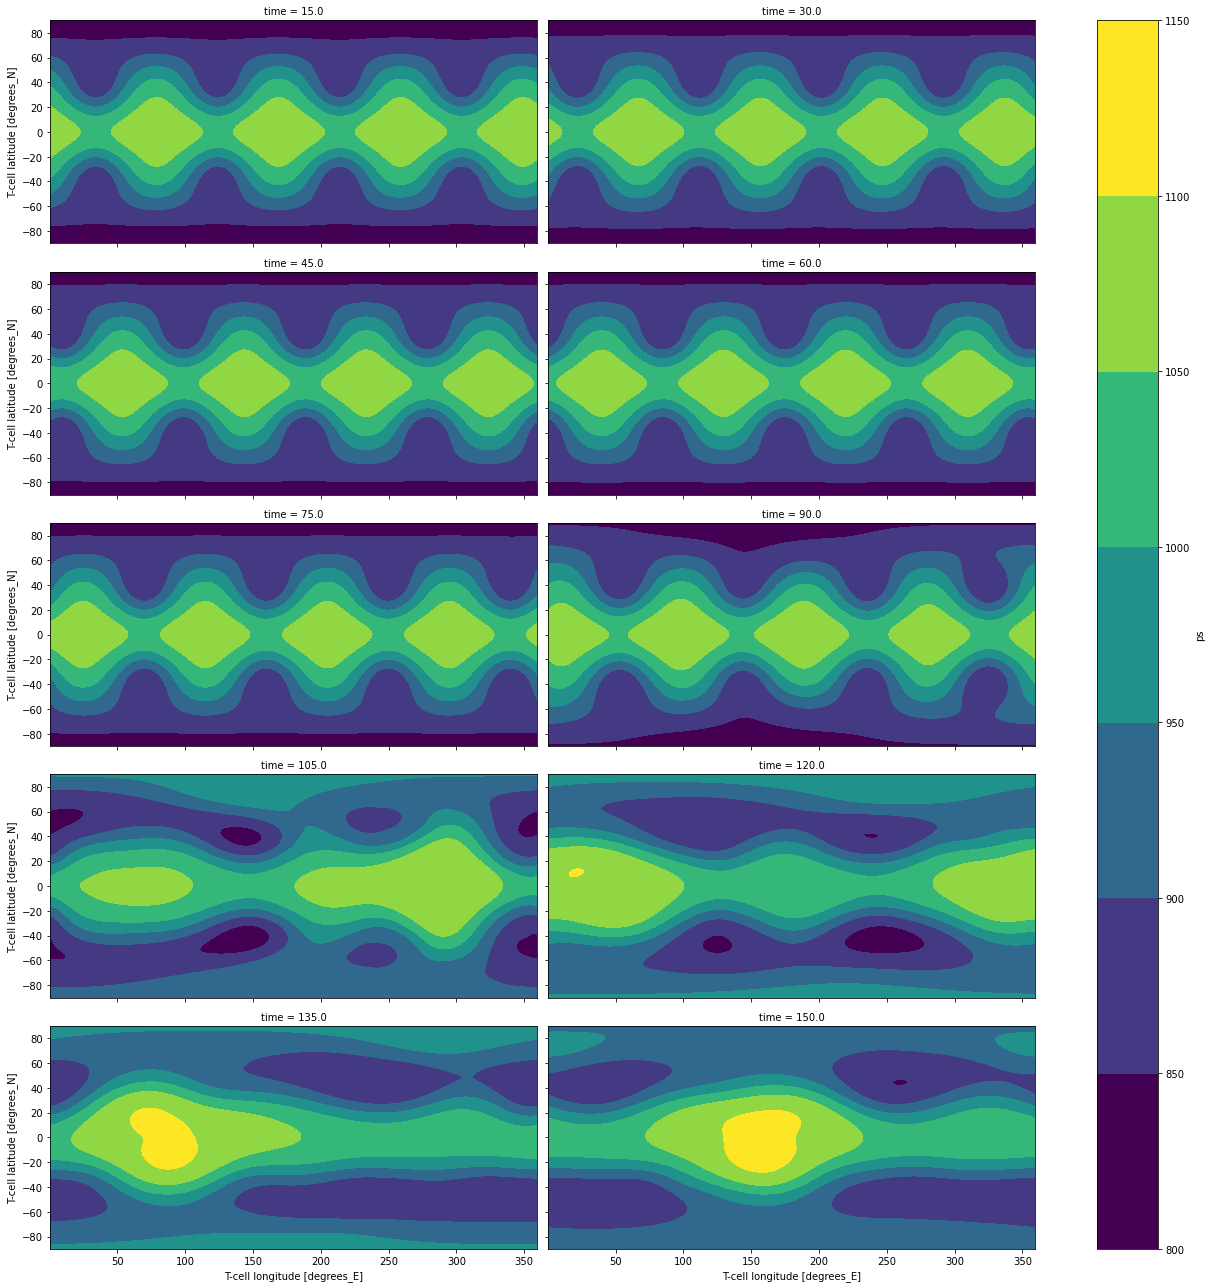

In [4]:
ps = da96.ps.sel(time=slice(15, 160, 15))/9.81
ps.plot.contourf(x="lon", y="lat", col="time", col_wrap=2, figsize=(18,18))

Below is plotted the potential vorticity. Noteable are the sharp PV fronts and reversed meridional PV gradients that have formed by day 90, which are a signature of the impending breakdown of the wave through barotropic instability. Here I have used a continuous colorbar to show the beautiful swirled structure after day 100.

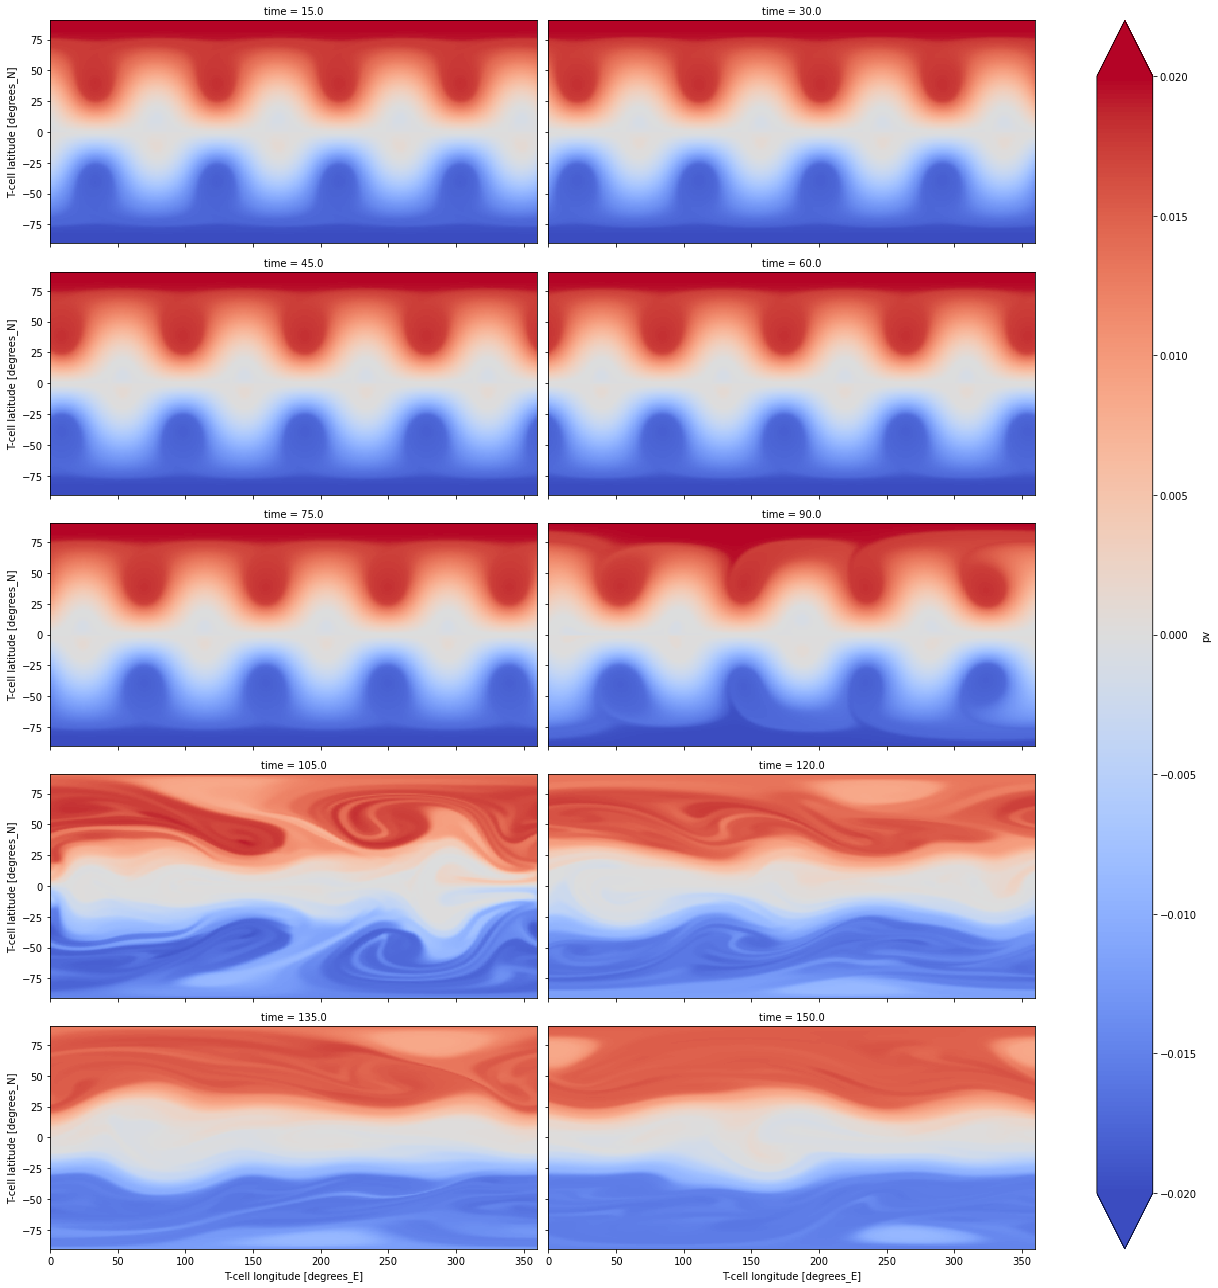

In [5]:
pv = da96.pv.sel(time=slice(15, 160, 15))*1.e6
pv.plot(x="lon", y="lat", col="time", col_wrap=2, figsize=(18,18), cmap=cm.get_cmap("coolwarm"),vmin=-0.02,vmax=0.02)

It is interesting to see what happens to an initially longitudinally-inhomogeneous tracer field. Here we initialize with a "Chlorine"-like tracer which is 1 over half of the earth (representing the illuminated half of the world at 0Z during the boreal summmer solstice) and watch it get distorted. Note that the times are different from the earlier plots, to show aesthetically-pleasing times

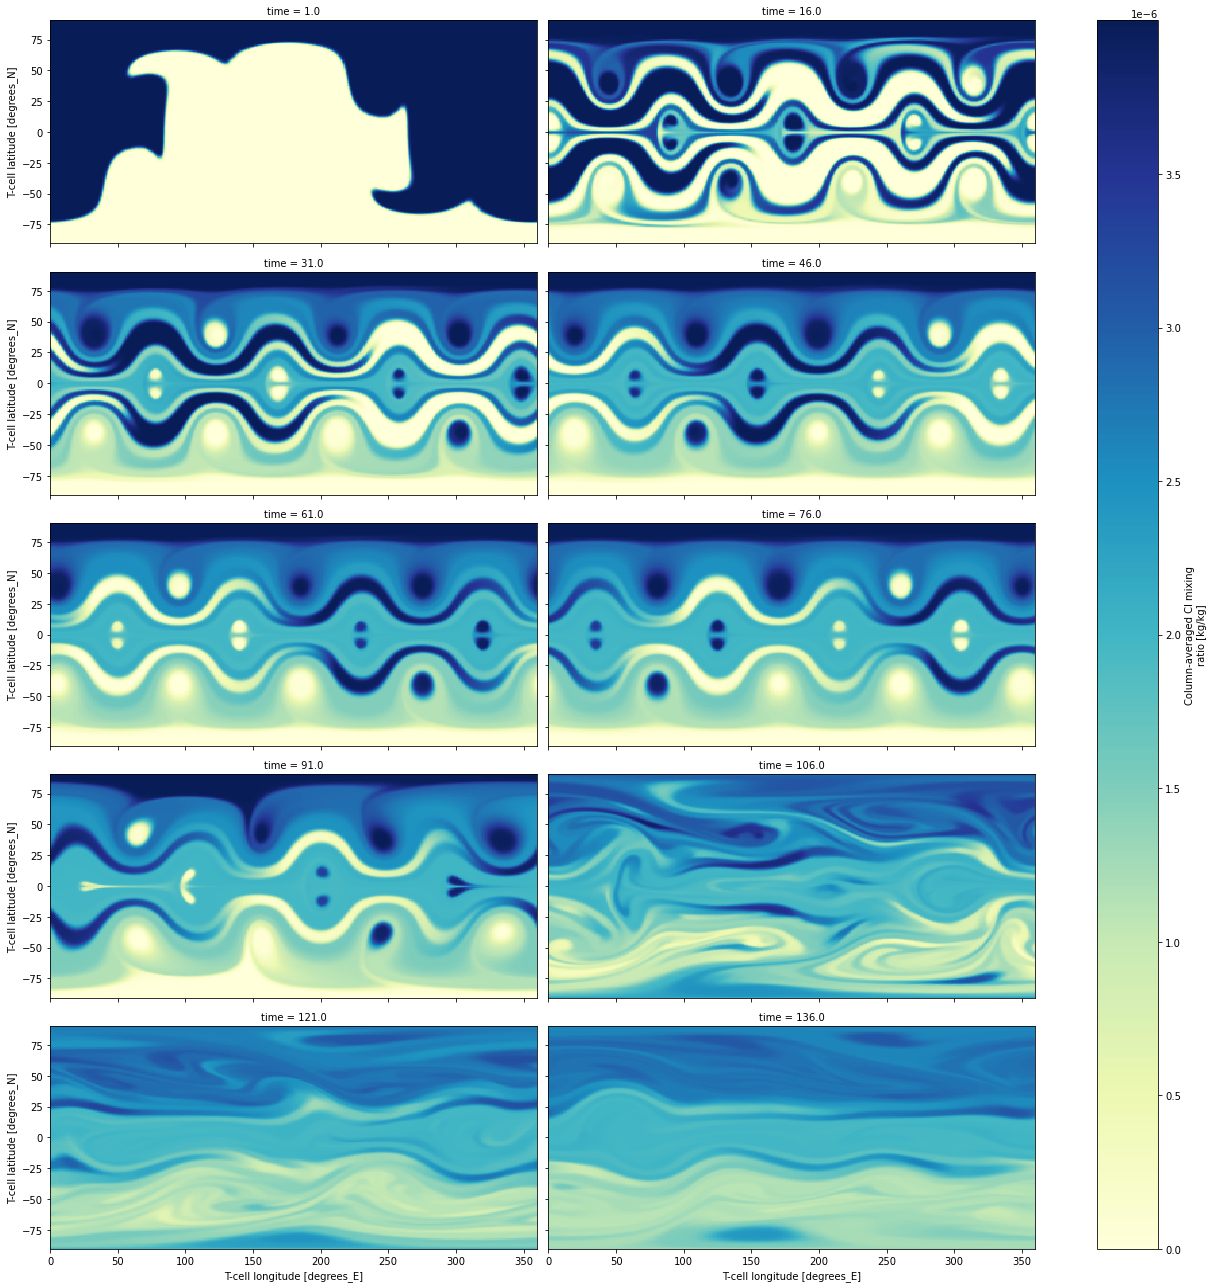

In [6]:
acl = da96.acl.sel(time=slice(0, 150, 15))
acl.plot(x="lon", y="lat", col="time", col_wrap=2, figsize=(18,18), cmap=cm.get_cmap("YlGnBu"))

We can also plot a linearly-correlated tracer whose sum (ie. acl + 2\*acl2) with the other is initially equal to 1. The sum is identically 1 for the entire 150 days of the simulation: the FV3 advection scheme maintains perfect linear correlations forever.

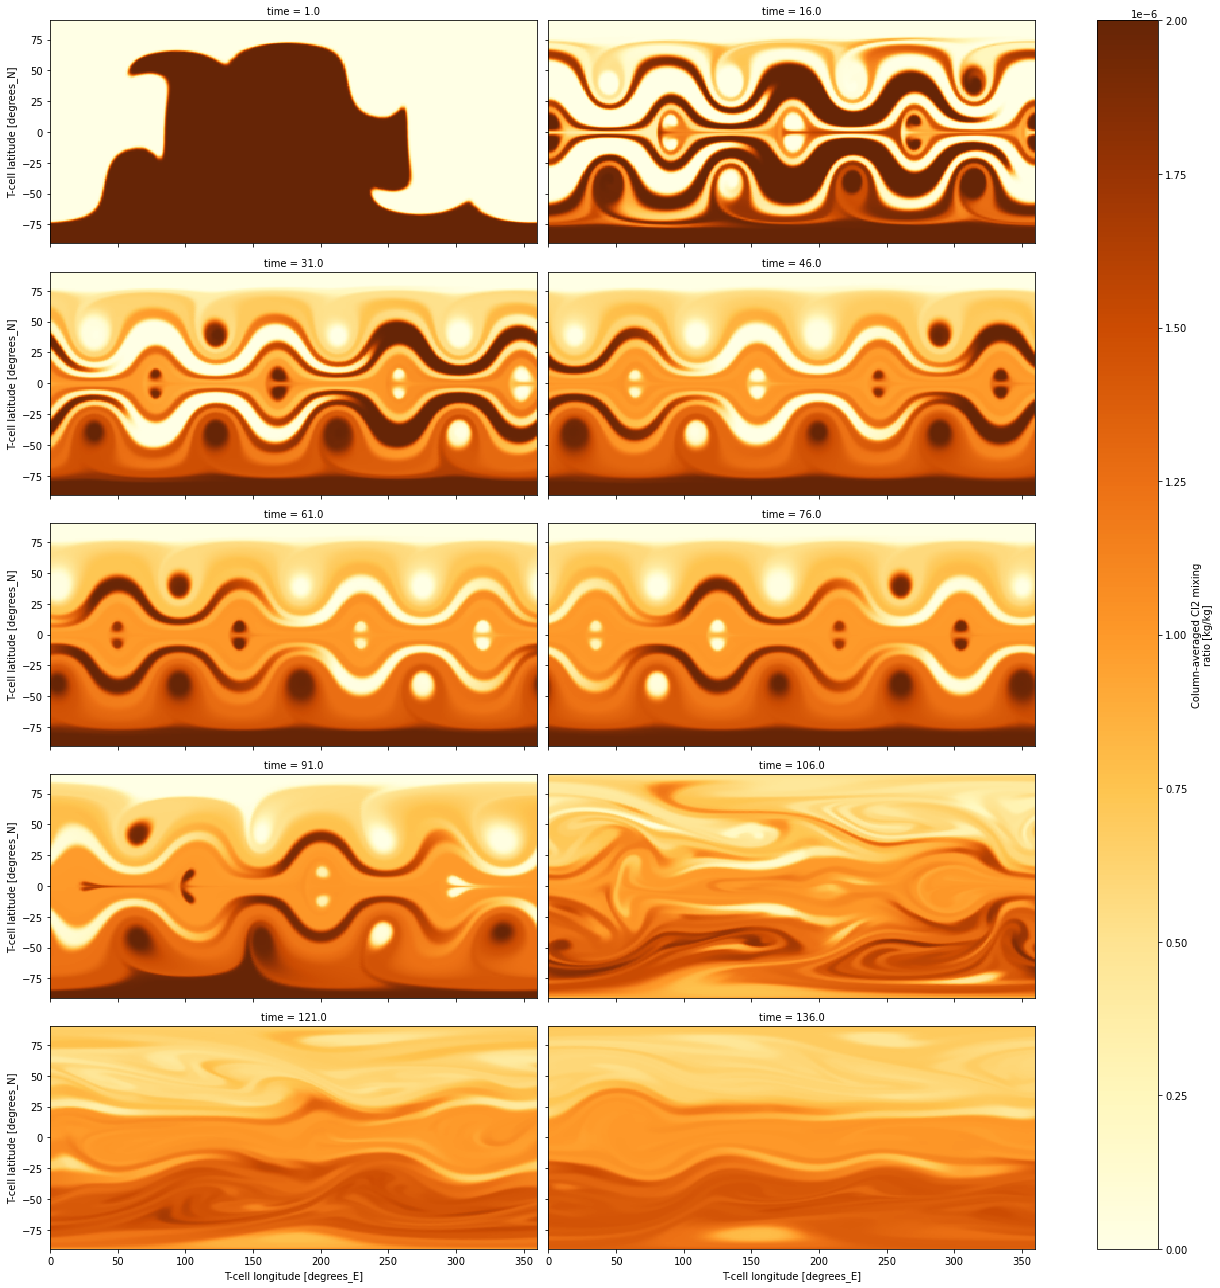

In [8]:
acl2 = da96.acl2.sel(time=slice(0, 150, 15))
acl2.plot(x="lon", y="lat", col="time", col_wrap=2, figsize=(18,18), cmap=cm.get_cmap("YlOrBr"), vmax=2.e-6, vmin=0)